In [ ]:
#@title Import Libraries
# General data science libraries
import pandas as pd
import numpy as np

# Pulling data from APIs, parsing JSON
import requests
import json

# Interfacing w/ Cloud Storage from Python
from google.cloud import storage

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML, Image

from concurrent.futures import ThreadPoolExecutor, as_completed

In [ ]:
#@title Modify Settings

# Expand max column width when displaying data frames to handle longer text
pd.set_option('display.max_columns', None)

In [ ]:
#@title Function to Load Newline Delimited JSON into Pandas DF
def load_newline_delimited_json(url):
    """Loads a newline-delimited JSON file from a URL into a pandas DataFrame.

    Args:
        url: The URL of the newline-delimited JSON file.

    Returns:
        A pandas DataFrame containing the data, or None if an error occurs.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes

        data = []
        for line in response.text.strip().split('\n'):
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON line: {line} due to error: {e}")

        return pd.DataFrame(data)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading data: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [ ]:
#@title Function to Process Results from Various MLB Stats API Endpoints
def process_endpoint_url(endpoint_url, pop_key=None):
  """
  Fetches data from a URL, parses JSON, and optionally pops a key.

  Args:
    endpoint_url: The URL to fetch data from.
    pop_key: The key to pop from the JSON data (optional, defaults to None).

  Returns:
    A pandas DataFrame containing the processed data
  """
  json_result = requests.get(endpoint_url).content

  data = json.loads(json_result)

   # if pop_key is provided, pop key and normalize nested fields
  if pop_key:
    df_result = pd.json_normalize(data.pop(pop_key), sep = '_')
  # if pop_key is not provided, normalize entire json
  else:
    df_result = pd.json_normalize(data)

  return df_result

In [ ]:
#@title Teams
# Use "?sportId=1" in following URL for MLB only
teams_endpoint_url = 'https://statsapi.mlb.com/api/v1/teams?sportId=1'

teams = process_endpoint_url(teams_endpoint_url, 'teams')

display(teams)

,allStarStatus,id,name,link,season,teamCode,fileCode,abbreviation,teamName,locationName,firstYearOfPlay,shortName,franchiseName,clubName,active,springLeague_id,springLeague_name,springLeague_link,springLeague_abbreviation,venue_id,venue_name,venue_link,springVenue_id,springVenue_link,league_id,league_name,league_link,division_id,division_name,division_link,sport_id,sport_link,sport_name
0,N,133,Athletics,/api/v1/teams/133,2025,ath,ath,ATH,Athletics,Sacramento,1901,Athletics,Athletics,Athletics,True,114,Cactus League,/api/v1/league/114,CL,2529,Sutter Health Park,/api/v1/venues/2529,2507,/api/v1/venues/2507,103,American League,/api/v1/league/103,200,American League West,/api/v1/divisions/200,1,/api/v1/sports/1,Major League Baseball
1,N,134,Pittsburgh Pirates,/api/v1/teams/134,2025,pit,pit,PIT,Pirates,Pittsburgh,1882,Pittsburgh,Pittsburgh,Pirates,True,115,Grapefruit League,/api/v1/league/115,GL,31,PNC Park,/api/v1/venues/31,2526,/api/v1/venues/2526,104,National League,/api/v1/league/104,205,National League Central,/api/v1/divisions/205,1,/api/v1/sports/1,Major League Baseball
2,N,135,San Diego Padres,/api/v1/teams/135,2025,sdn,sd,SD,Padres,San Diego,1968,San Diego,San Diego,Padres,True,114,Cactus League,/api/v1/league/114,CL,2680,Petco Park,/api/v1/venues/2680,2530,/api/v1/venues/2530,104,National League,/api/v1/league/104,203,National League West,/api/v1/divisions/203,1,/api/v1/sports/1,Major League Baseball
3,N,136,Seattle Mariners,/api/v1/teams/136,2025,sea,sea,SEA,Mariners,Seattle,1977,Seattle,Seattle,Mariners,True,114,Cactus League,/api/v1/league/114,CL,680,T-Mobile Park,/api/v1/venues/680,2530,/api/v1/venues/2530,103,American League,/api/v1/league/103,200,American League West,/api/v1/divisions/200,1,/api/v1/sports/1,Major League Baseball
4,N,137,San Francisco Giants,/api/v1/teams/137,2025,sfn,sf,SF,Giants,San Francisco,1883,San Francisco,San Francisco,Giants,True,114,Cactus League,/api/v1/league/114,CL,2395,Oracle Park,/api/v1/venues/2395,2532,/api/v1/venues/2532,104,National League,/api/v1/league/104,203,National League West,/api/v1/divisions/203,1,/api/v1/sports/1,Major League Baseball
5,N,138,St. Louis Cardinals,/api/v1/teams/138,2025,sln,stl,STL,Cardinals,St. Louis,1892,St. Louis,St. Louis,Cardinals,True,115,Grapefruit League,/api/v1/league/115,GL,2889,Busch Stadium,/api/v1/venues/2889,2520,/api/v1/venues/2520,104,National League,/api/v1/league/104,205,National League Central,/api/v1/divisions/205,1,/api/v1/sports/1,Major League Baseball
6,N,139,Tampa Bay Rays,/api/v1/teams/139,2025,tba,tb,TB,Rays,Tampa,1996,Tampa Bay,Tampa Bay,Rays,True,115,Grapefruit League,/api/v1/league/115,GL,2523,George M. Steinbrenner Field,/api/v1/venues/2523,2534,/api/v1/venues/2534,103,American League,/api/v1/league/103,201,American League East,/api/v1/divisions/201,1,/api/v1/sports/1,Major League Baseball
7,N,140,Texas Rangers,/api/v1/teams/140,2025,tex,tex,TEX,Rangers,Arlington,1961,Texas,Texas,Rangers,True,114,Cactus League,/api/v1/league/114,CL,5325,Globe Life Field,/api/v1/venues/5325,2603,/api/v1/venues/2603,103,American League,/api/v1/league/103,200,American League West,/api/v1/divisions/200,1,/api/v1/sports/1,Major League Baseball
8,N,141,Toronto Blue Jays,/api/v1/teams/141,2025,tor,tor,TOR,Blue Jays,Toronto,1977,Toronto,Toronto,Blue Jays,True,115,Grapefruit League,/api/v1/league/115,GL,14,Rogers Centre,/api/v1/venues/14,2536,/api/v1/venues/2536,103,American League,/api/v1/league/103,201,American League East,/api/v1/divisions/201,1,/api/v1/sports/1,Major League Baseball
9,N,142,Minnesota Twins,/api/v1/teams/142,2025,min,min,MIN,Twins,Minneapolis,1901,Minnesota,Minnesota,Twins,True,115,Grapefruit League,/api/v1/league/115,GL,3312,Target Field,/api/v1/venues/3312,2862,/api/v1/venues/2862,103,American League,/api/v1/league/103,202,American League Central,/api/v1/divisions/202,1,/api/v1/sports/1,Major League Baseball


In [ ]:
#@title All Players from 1 Season

# Pick single season to get all players for (default is 2024)
season = 2023 # @param {type:"integer"}

single_season_players_url = f'https://statsapi.mlb.com/api/v1/sports/1/players?season={season}'

players = process_endpoint_url(single_season_players_url, 'people')

display(players)

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthCountry,height,weight,active,useName,useLastName,middleName,boxscoreName,nickName,gender,isPlayer,isVerified,pronunciation,mlbDebutDate,nameFirstLast,nameSlug,firstLastName,lastFirstName,lastInitName,initLastName,fullFMLName,fullLFMName,strikeZoneTop,strikeZoneBottom,currentTeam_id,currentTeam_name,currentTeam_link,primaryPosition_code,primaryPosition_name,primaryPosition_type,primaryPosition_abbreviation,batSide_code,batSide_description,pitchHand_code,pitchHand_description,birthStateProvince,draftYear,nameMatrilineal,nameTitle,nameSuffix,lastPlayedDate,deathDate,deathCity,deathCountry
0,472551,Fernando Abad,/api/v1/people/472551,Fernando,Abad,60,1985-12-17,39,La Romana,Dominican Republic,"6' 2""",235,True,Fernando,Abad,Antonio,Abad,Nandito,M,True,True,uh-BAWD,2010-07-28,Fernando Abad,fernando-abad-472551,Fernando Abad,"Abad, Fernando","Abad, F",F Abad,Fernando Antonio Abad,"Abad, Fernando Antonio",3.467,1.589,115,Colorado Rockies,/api/v1/teams/115,1,Pitcher,Pitcher,P,L,Left,L,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,671096,Andrew Abbott,/api/v1/people/671096,Andrew,Abbott,41,1999-06-01,25,Lynchburg,USA,"6' 0""",192,True,Andrew,Abbott,Cole,"Abbott, A",NaN,M,True,True,NaN,2023-06-05,Andrew Abbott,andrew-abbott-671096,Andrew Abbott,"Abbott, Andrew","Abbott, A",A Abbott,Andrew Cole Abbott,"Abbott, Andrew Cole",3.370,1.540,113,Cincinnati Reds,/api/v1/teams/113,1,Pitcher,Pitcher,P,L,Left,L,Left,VA,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,676265,Cory Abbott,/api/v1/people/676265,Cory,Abbott,77,1995-09-20,29,San Diego,USA,"6' 2""",217,True,Cory,Abbott,James,"Abbott, C",NaN,M,True,True,NaN,2021-06-05,Cory Abbott,cory-abbott-676265,Cory Abbott,"Abbott, Cory","Abbott, C",C Abbott,Cory James Abbott,"Abbott, Cory James",3.467,1.589,120,Washington Nationals,/api/v1/teams/120,1,Pitcher,Pitcher,P,R,Right,R,Right,CA,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,682928,CJ Abrams,/api/v1/people/682928,Paul,Abrams,5,2000-10-03,24,Alpharetta,USA,"6' 2""",191,True,CJ,Abrams,Christopher,Abrams,NaN,M,True,True,NaN,2022-04-08,CJ Abrams,cj-abrams-682928,CJ Abrams,"Abrams, CJ","Abrams, C",C Abrams,Paul Christopher Abrams,"Abrams, Paul Christopher",3.480,1.580,120,Washington Nationals,/api/v1/teams/120,6,Shortstop,Infielder,SS,L,Left,R,Right,GA,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,656061,Albert Abreu,/api/v1/people/656061,Albert,Abreu,84,1995-09-26,29,Guayubin,Dominican Republic,"6' 2""",190,True,Albert,Abreu,Enmanuel,"Abreu, A",NaN,M,True,True,NaN,2020-08-08,Albert Abreu,albert-abreu-656061,Albert Abreu,"Abreu, Albert","Abreu, A",A Abreu,Albert Enmanuel Abreu,"Abreu, Albert Enmanuel",3.467,1.589,147,New York Yankees,/api/v1/teams/147,1,Pitcher,Pitcher,P,R,Right,R,Right,NaN,NaN,Dias,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,664874,Seby Zavala,/api/v1/people/664874,Bernardo,Zavala,59,1993-08-28,31,Fort Hood,USA,"5' 11""",205,True,Seby,Zavala,Sebastian,Zavala,Seby,M,True,True,SEB-ee zuh-VA-luh,2019-05-25,Seby Zavala,seby-zavala-664874,Seby Zavala,"Zavala, Seby","Zavala, S",S Zavala,Bernardo Sebastian Zavala,"Zavala, Bernardo Sebastian",3.200,1.430,109,Arizona Diamondbacks,/api/v1/teams/109,2,Catcher,Catcher,C,R,Right,R,Right,TX,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,672582,Angel Zerpa,/api/v1/people/672582,Angel,Zerpa,61,1999-09-27,25,Valle de la Pascua,Venezuela,"6' 0""",220,True,Angel,Zerpa,David,Zerpa,NaN,M,True,True,AHN-hel SAIR-pah,2021-09-30,Angel Zerpa,angel-zerpa-672582,Angel Zerpa,"Zerpa, Angel","Zerpa, A",A Zerpa,Angel David Zerpa,"Zerpa, Angel David",3.371,1.535,118,Kansas City Royals,/api/v1/teams/118,1,Pitcher,Pitcher,P,L,Left,L,Left,NaN,NaN,Palacios,NaN,NaN,NaN,NaN,NaN,NaN
1454,669145,Bruce Zimmermann,/api/v1/people/669145,Bruce,Zimmermann,50,1995-02-09,30,Baltimore,

In [ ]:
#@title Spring Schedule / Games

# Pick single season to get schedule for (default is 2024)
season = 2025 # @param {type:"integer"}

# Can change season to get other seasons' games info
schedule_endpoint_url = f'https://statsapi.mlb.com/api/v1/schedule?sportId=1&season={season}&gameType=S'

schedule_dates = process_endpoint_url(schedule_endpoint_url, "dates")

games = pd.json_normalize(
    schedule_dates.explode('games').reset_index(drop = True)['games'])

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,isTie,gameNumber,publicFacing,doubleHeader,gamedayType,tiebreaker,calendarEventID,seasonDisplay,dayNight,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription,status.abstractGameState,status.codedGameState,status.detailedState,status.statusCode,status.startTimeTBD,status.abstractGameCode,teams.away.leagueRecord.wins,teams.away.leagueRecord.losses,teams.away.leagueRecord.pct,teams.away.score,teams.away.team.id,teams.away.team.name,teams.away.team.link,teams.away.isWinner,teams.away.splitSquad,teams.away.seriesNumber,teams.home.leagueRecord.wins,teams.home.leagueRecord.losses,teams.home.leagueRecord.pct,teams.home.score,teams.home.team.id,teams.home.team.name,teams.home.team.link,teams.home.isWinner,teams.home.splitSquad,teams.home.seriesNumber,venue.id,venue.name,venue.link,content.link,status.reason,description
466,778709,7bcefc5f-136c-49f0-9db2-28b6a04dadf9,/api/v1.1/game/778709/feed/live,S,2025,2025-03-25T18:35:00Z,2025-03-25,NaN,1,True,N,P,N,14-778709-2025-03-25,2025,day,9,False,120,3.0,3.0,Spring Training,S,N,Normal Game,Preview,S,Scheduled,S,False,P,3,0,1.000,NaN,118,Kansas City Royals,/api/v1/teams/118,NaN,False,31.0,0,3,.000,NaN,140,Texas Rangers,/api/v1/teams/140,NaN,False,31.0,5325,Globe Life Field,/api/v1/venues/5325,/api/v1/game/778709/content,NaN,at Globe Life Field
467,787931,e844ec96-cef5-4c28-96fd-516209f0d883,/api/v1.1/game/787931/feed/live,S,2025,2025-03-25T19:40:00Z,2025-03-25,NaN,1,True,N,P,N,14-787931-2025-03-25,2025,day,9,False,120,2.0,2.0,Spring Training,S,N,Normal Game,Preview,S,Scheduled,S,False,P,1,1,.500,NaN,114,Cleveland Guardians,/api/v1/teams/114,NaN,False,31.0,0,3,.000,NaN,109,Arizona Diamondbacks,/api/v1/teams/109,NaN,False,34.0,15,Chase Field,/api/v1/venues/15,/api/v1/game/787931/content,NaN,at Chase Field
468,778748,957a78eb-9d28-464b-9ed9-809f076d3106,/api/v1.1/game/778748/feed/live,S,2025,2025-03-25T20:05:00Z,2025-03-25,NaN,1,True,N,Y,N,14-778748-2025-03-25,2025,day,9,False,120,2.0,2.0,Spring Training,S,N,Normal Game,Preview,S,Scheduled,S,False,P,0,2,.000,NaN,144,Atlanta Braves,/api/v1/teams/144,NaN,False,30.0,4,0,1.000,NaN,112,Chicago Cubs,/api/v1/teams/112,NaN,False,23.0,4629,Sloan Park,/api/v1/venues/4629,/api/v1/game/778748/content,NaN,NaN
469,789323,9099843f-d057-43a3-b49a-ce223b41c82d,/api/v1.1/game/789323/feed/live,S,2025,2025-03-26T00:00:00Z,2025-03-25,NaN,1,True,N,P,N,14-789323-2025-03-25,2025,day,9,False,120,2.0,2.0,Spring Training,S,N,Normal Game,Preview,S,Scheduled,S,False,P,2,0,1.000,NaN,116,Detroit Tigers,/api/v1/teams/116,NaN,False,31.0,2,0,1.000,NaN,137,San Francisco Giants,/api/v1/teams/137,NaN,False,31.0,2395,Oracle Park,/api/v1/venues/2395,/api/v1/game/789323/content,NaN,at Oracle Park
470,787997,b349080f-39a5-488d-be13-88a1fc735abe,/api/v1.1/game/787997/feed/live,S,2025,2025-03-26T01:07:00Z,2025-03-25,NaN,1,True,N,P,N,14-787997-2025-03-25,2025,night,9,False,120,3.0,3.0,Spring Training,S,N,Normal Game,Preview,S,Scheduled,S,False,P,1,3,.250,NaN,119,Los Angeles Dodgers,/api/v1/teams/119,NaN,False,20.0,1,1,.500,NaN,108,Los Angeles Angels,/api/v1/teams/108,NaN,False,32.0,1,Angel Stadium,/api/v1/venues/1,/api/v1/game/787997/content,NaN,at Angel Stadium


In [ ]:
games

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,isTie,gameNumber,publicFacing,doubleHeader,gamedayType,tiebreaker,calendarEventID,seasonDisplay,dayNight,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription,status.abstractGameState,status.codedGameState,status.detailedState,status.statusCode,status.startTimeTBD,status.abstractGameCode,teams.away.leagueRecord.wins,teams.away.leagueRecord.losses,teams.away.leagueRecord.pct,teams.away.score,teams.away.team.id,teams.away.team.name,teams.away.team.link,teams.away.isWinner,teams.away.splitSquad,teams.away.seriesNumber,teams.home.leagueRecord.wins,teams.home.leagueRecord.losses,teams.home.leagueRecord.pct,teams.home.score,teams.home.team.id,teams.home.team.name,teams.home.team.link,teams.home.isWinner,teams.home.splitSquad,teams.home.seriesNumber,venue.id,venue.name,venue.link,content.link,status.reason,description
0,778869,bdfebb15-f31a-405e-b089-6ba29b6e4a81,/api/v1.1/game/778869/feed/live,S,2025,2025-02-20T20:05:00Z,2025-02-20,False,1,True,N,E,N,14-778869-2025-02-20,2025,day,9,False,120,2.0,1.0,Spring Training,S,N,Normal Game,Final,F,Final,F,False,F,1,0,1.000,12.0,112,Chicago Cubs,/api/v1/teams/112,True,False,1.0,0,1,.000,4.0,119,Los Angeles Dodgers,/api/v1/teams/119,False,False,1.0,3809,Camelback Ranch,/api/v1/venues/3809,/api/v1/game/778869/content,NaN,NaN
1,779055,c397593d-b32d-4a65-adaa-56c8792108b7,/api/v1.1/game/779055/feed/live,S,2025,2025-02-21T18:05:00Z,2025-02-21,False,1,True,N,E,N,14-779055-2025-02-21,2025,day,9,False,120,1.0,1.0,Spring Training,S,N,Normal Game,Final,F,Final,F,False,F,0,1,.000,0.0,139,Tampa Bay Rays,/api/v1/teams/139,False,False,1.0,1,0,1.000,4.0,147,New York Yankees,/api/v1/teams/147,True,False,1.0,2523,George M. Steinbrenner Field,/api/v1/venues/2523,/api/v1/game/779055/content,NaN,NaN
2,778760,6c1c5efb-0cbe-42d2-a760-79763eb2beca,/api/v1.1/game/778760/feed/live,S,2025,2025-02-21T20:05:00Z,2025-02-21,False,1,True,N,Y,N,14-778760-2025-02-21,2025,day,9,False,120,2.0,2.0,Spring Training,S,N,Normal Game,Final,F,Final,F,False,F,0,2,.000,3.0,119,Los Angeles Dodgers,/api/v1/teams/119,False,False,1.0,2,0,1.000,7.0,112,Chicago Cubs,/api/v1/teams/112,True,False,1.0,4629,Sloan Park,/api/v1/venues/4629,/api/v1/game/778760/content,NaN,NaN
3,778949,7a498ea4-940d-485b-b252-40653f3a6f15,/api/v1.1/game/778949/feed/live,S,2025,2025-02-21T20:05:00Z,2025-02-21,False,1,True,N,E,N,14-778949-2025-02-21,2025,day,9,False,120,1.0,1.0,Spring Training,S,N,Normal Game,Final,F,Final,F,False,F,0,1,.000,2.0,140,Texas Rangers,/api/v1/teams/140,False,False,1.0,1,0,1.000,5.0,118,Kansas City Royals,/api/v1/teams/118,True,False,1.0,2603,Surprise Stadium,/api/v1/venues/2603,/api/v1/game/778949/content,NaN,NaN
4,787940,0fdb78ab-34f7-4a93-9943-c35bb5ce82b6,/api/v1.1/game/787940/feed/live,S,2025,2025-02-21T20:10:00Z,2025-02-21,False,1,True,N,E,N,14-787940-2025-02-21,2025,day,9,False,120,2.0,1.0,Spring Training,S,N,Normal Game,Final,F,Final,F,False,F,1,0,1.000,12.0,115,Colorado Rockies,/api/v1/teams/115,True,False,1.0,0,1,.000,8.0,109,Arizona Diamondbacks,/api/v1/teams/109,False,False,1.0,4249,Salt River Fields at Talking Stick,/api/v1/venues/4249,/api/v1/game/787940/content,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,778709,7bcefc5f-136c-49f0-9db2-28b6a04dadf9,/api/v1.1/game/778709/feed/live,S,2025,2025-03-25T18:35:00Z,2025-03-25,NaN,1,True,N,P,N,14-778709-2025-03-25,2025,day,9,False,120,3.0,3.0,Spring Training,S,N,Normal Game,Preview,S,Scheduled,S,False,P,3,0,1.000,NaN,118,Kansas City Royals,/api/v1/teams/118,NaN,False,31.0,0,3,.000,NaN,140,Texas Rangers,/api/v1/teams/140,NaN,False,31.0,5325,Globe Life Field,/api/v1/venues/5325,/api/v1/game/778709/content,NaN,at Globe Life Field
467,7

In [ ]:
#@title Schedule / Games

# Pick single season to get schedule for (default is 2024)
season = 2023 # @param {type:"integer"}

# Can change season to get other seasons' games info
schedule_endpoint_url = f'https://statsapi.mlb.com/api/v1/schedule?sportId=1&season={season}&gameType=R'

schedule_dates = process_endpoint_url(schedule_endpoint_url, "dates")

games = pd.json_normalize(
    schedule_dates.explode('games').reset_index(drop = True)['games'])

games.tail()

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,isTie,gameNumber,publicFacing,doubleHeader,gamedayType,tiebreaker,calendarEventID,seasonDisplay,dayNight,description,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription,status.abstractGameState,status.codedGameState,status.detailedState,status.statusCode,status.startTimeTBD,status.abstractGameCode,teams.away.leagueRecord.wins,teams.away.leagueRecord.losses,teams.away.leagueRecord.pct,teams.away.score,teams.away.team.id,teams.away.team.name,teams.away.team.link,teams.away.isWinner,teams.away.splitSquad,teams.away.seriesNumber,teams.home.leagueRecord.wins,teams.home.leagueRecord.losses,teams.home.leagueRecord.pct,teams.home.score,teams.home.team.id,teams.home.team.name,teams.home.team.link,teams.home.isWinner,teams.home.splitSquad,teams.home.seriesNumber,venue.id,venue.name,venue.link,content.link,rescheduleDate,rescheduleGameDate,status.reason,rescheduledFrom,rescheduledFromDate,resumeDate,resumeGameDate,resumedFrom,resumedFromDate
2471,716356,7cbab121-3edf-459a-bb68-e3ebd4d6ae87,/api/v1.1/game/716356/feed/live,R,2023,2023-10-01T19:10:00Z,2023-10-01,False,1,True,N,P,N,14-716356-2023-10-01,2023,day,NaN,9,False,120,3,3,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,82,80,.506,2.0,135,San Diego Padres,/api/v1/teams/135,True,False,52,61,101,.377,1.0,145,Chicago White Sox,/api/v1/teams/145,False,False,52,4,Guaranteed Rate Field,/api/v1/venues/4,/api/v1/game/716356/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2472,716352,f4f42ab9-8d91-44e0-9fe5-4fa150005dac,/api/v1.1/game/716352/feed/live,R,2023,2023-10-01T19:10:00Z,2023-10-01,False,1,True,N,P,N,14-716352-2023-10-01,2023,day,NaN,9,False,120,3,3,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,82,80,.506,2.0,147,New York Yankees,/api/v1/teams/147,False,False,52,56,106,.346,5.0,118,Kansas City Royals,/api/v1/teams/118,True,False,52,7,Kauffman Stadium,/api/v1/venues/7,/api/v1/game/716352/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2473,716364,d6dfcdd2-03c3-4fa2-ad8d-5b8239ea35fb,/api/v1.1/game/716364/feed/live,R,2023,2023-10-01T19:10:00Z,2023-10-01,False,1,True,N,P,N,14-716364-2023-10-01,2023,day,NaN,9,False,120,3,3,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,83,79,.512,0.0,112,Chicago Cubs,/api/v1/teams/112,False,False,52,92,70,.568,4.0,158,Milwaukee Brewers,/api/v1/teams/158,True,False,51,32,American Family Field,/api/v1/venues/32,/api/v1/game/716364/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2474,716353,cd07873e-b75a-4902-a329-166537c5c032,/api/v1.1/game/716353/feed/live,R,2023,2023-10-01T19:15:00Z,2023-10-01,False,1,True,N,P,N,14-716353-2023-10-01,2023,day,NaN,9,False,120,3,3,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,82,80,.506,3.0,113,Cincinnati Reds,/api/v1/teams/113,False,False,51,71,91,.438,4.0,138,St. Louis Cardinals,/api/v1/teams/138,True,False,52,2889,Busch Stadium,/api/v1/venues/2889,/api/v1/game/716353/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2475,716404,d955152f-bb5f-400f-a37c-25fbe4b8162d,/api/v1.1/game/716404/feed/live,R,2023,2023-10-02T17:10:00Z,2023-09-28,False,1,True,N,P,N,14-716404-2023-10-02,2023,day,NaN,9,False,120,0,1,Regular Season,S,N,Normal Game,Final,F,Completed Early,FR,False,F,82,77,.516,0.0,146,Miami Marlins,/api/v1/teams/146,False,False,53,73,86,.459,1.0,121,New York Mets,/api/v1/teams/121,True,False,53,3289,Citi Field,/api/v1/venues/3289,/api/v1/game/716404/content,NaN,NaN,Rain,NaN,NaN,NaN,NaN,2023-09-28T23:10:00Z,2023-09-28


In [ ]:
schedule_df = games

In [ ]:
schedule_df

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,isTie,gameNumber,publicFacing,doubleHeader,gamedayType,tiebreaker,calendarEventID,seasonDisplay,dayNight,description,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription,status.abstractGameState,status.codedGameState,status.detailedState,status.statusCode,status.startTimeTBD,status.abstractGameCode,teams.away.leagueRecord.wins,teams.away.leagueRecord.losses,teams.away.leagueRecord.pct,teams.away.score,teams.away.team.id,teams.away.team.name,teams.away.team.link,teams.away.isWinner,teams.away.splitSquad,teams.away.seriesNumber,teams.home.leagueRecord.wins,teams.home.leagueRecord.losses,teams.home.leagueRecord.pct,teams.home.score,teams.home.team.id,teams.home.team.name,teams.home.team.link,teams.home.isWinner,teams.home.splitSquad,teams.home.seriesNumber,venue.id,venue.name,venue.link,content.link,rescheduleDate,rescheduleGameDate,status.reason,rescheduledFrom,rescheduledFromDate,resumeDate,resumeGameDate,resumedFrom,resumedFromDate
0,718780,28889d0d-b745-4054-b0d3-5fc4cfa06df9,/api/v1.1/game/718780/feed/live,R,2023,2023-03-30T17:05:00Z,2023-03-30,False,1,True,N,P,N,14-718780-2023-03-30,2023,day,Nationals home opener,9,False,120,3,1,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,1,0,1.000,7.0,144,Atlanta Braves,/api/v1/teams/144,True,False,1,0,1,.000,2.0,120,Washington Nationals,/api/v1/teams/120,False,False,1,3309,Nationals Park,/api/v1/venues/3309,/api/v1/game/718780/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,718781,ff222b1e-8305-4b37-89a5-2e150e1a708f,/api/v1.1/game/718781/feed/live,R,2023,2023-03-30T17:05:00Z,2023-03-30,False,1,True,N,P,N,14-718781-2023-03-30,2023,day,Yankees home opener,9,False,145,3,1,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,0,1,.000,0.0,137,San Francisco Giants,/api/v1/teams/137,False,False,1,1,0,1.000,5.0,147,New York Yankees,/api/v1/teams/147,True,False,1,3313,Yankee Stadium,/api/v1/venues/3313,/api/v1/game/718781/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,718782,1f695ffe-1a00-41b0-b49e-49eba23de34b,/api/v1.1/game/718782/feed/live,R,2023,2023-03-30T18:10:00Z,2023-03-30,False,1,True,N,P,N,14-718782-2023-03-30,2023,day,Red Sox home opener,9,False,120,3,1,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,1,0,1.000,10.0,110,Baltimore Orioles,/api/v1/teams/110,True,False,1,0,1,.000,9.0,111,Boston Red Sox,/api/v1/teams/111,False,False,1,3,Fenway Park,/api/v1/venues/3,/api/v1/game/718782/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,718777,5c968a1a-e61e-42fa-8609-720a021e6c35,/api/v1.1/game/718777/feed/live,R,2023,2023-03-30T18:20:00Z,2023-03-30,False,1,True,N,P,N,14-718777-2023-03-30,2023,day,Cubs home opener,9,False,120,3,1,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,0,1,.000,0.0,158,Milwaukee Brewers,/api/v1/teams/158,False,False,1,1,0,1.000,4.0,112,Chicago Cubs,/api/v1/teams/112,True,False,1,17,Wrigley Field,/api/v1/venues/17,/api/v1/game/718777/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,718776,a2bf6d6f-ec9e-44b3-9f37-9c4bfdc0969a,/api/v1.1/game/718776/feed/live,R,2023,2023-03-30T19:10:00Z,2023-03-30,False,1,True,N,P,N,14-718776-2023-03-30,2023,day,Rays home opener,9,False,120,3,1,Regular Season,S,N,Normal Game,Final,F,Final,F,False,F,0,1,.000,0.0,116,Detroit Tigers,/api/v1/teams/116,False,False,1,1,0,1.000,4.0,139,Tampa Bay Rays,/api/v1/teams/139,True,False,1,12,Tropicana Field,/api/v1/venues/12,/api/v1/game/718776/content,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,716356,7cbab121-3edf-459a-bb68-e3ebd4d6ae87,/api/v1.1/game/716356/feed/live,R,2023,2023-10-01T19:10:00Z,2023-10-01,False,1,True,N,P,N,14-716356-2023-10-01,2023,day,NaN,9,False,120,3

In [ ]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_game_data(game_link: str) -> dict:
    """
    Helper function to fetch game data for a single game.

    Parameters:
        game_link (str): The API endpoint (suffix) for the game.

    Returns:
        dict: The JSON response for the game.
    """
    url = "https://statsapi.mlb.com" + game_link
    response = requests.get(url)
    response.raise_for_status()  # Raises an error for bad responses
    return response.json()

def update_mlb_api_data_by_gamepk(schedule_df: pd.DataFrame) -> dict:
    """
    Retrieves MLB game data concurrently and returns a dictionary with gamePk as keys,
    extracting the gamePk from the JSON response.
    """
    results = {}
    max_workers = 20
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        # Map each future to the original gamePK from schedule_df
        future_to_gamepk = {
            executor.submit(fetch_game_data, row['link']): row['gamePk']
            for _, row in schedule_df.iterrows()
        }

        for future in as_completed(future_to_gamepk):
            orig_game_pk = future_to_gamepk[future]
            try:
                data = future.result()
                # Extract the gamePK from the JSON response. If not available, use the original.
                json_game_pk = data.get("gamePk", orig_game_pk)
            except Exception as exc:
                print(f"Error fetching game data for gamePK {orig_game_pk}: {exc}")
                data = None
                json_game_pk = orig_game_pk
            results[json_game_pk] = data

    return results


In [ ]:
# Usage:
mlb_data_by_gamepk = update_mlb_api_data_by_gamepk(schedule_df)

In [ ]:
# prompt: save mlb_data_by_gamepk to google drive

import pickle

# Assuming mlb_data_by_gamepk is already populated as in your provided code

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path in your Google Drive
file_path = '/content/drive/My Drive/mlb_data_by_gamepk.pkl'

# Save the dictionary to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(mlb_data_by_gamepk, file)

print(f"Data saved to {file_path}")


Mounted at /content/drive
Data saved to /content/drive/My Drive/mlb_data_by_gamepk.pkl


In [ ]:
# prompt: open a file from google drive

from google.colab import drive
import pickle

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in your Google Drive
file_path = '/content/drive/My Drive/mlb_data_by_gamepk_2023.pkl'

# Load the dictionary from the pickle file
try:
    with open(file_path, 'rb') as file:
        mlb_data_by_gamepk = pickle.load(file)
    print(f"Data loaded successfully from {file_path}")

    # Now you can work with the loaded data (mlb_data_by_gamepk)
    # For example, print the keys:
    #print(mlb_data_by_gamepk.keys())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
Data loaded successfully from /content/drive/My Drive/mlb_data_by_gamepk_2023.pkl


In [ ]:
import pandas as pd

In [ ]:
ab = pd.json_normalize(mlb_data_by_gamepk[718752]['liveData']['plays']['allPlays'])

In [ ]:
ab.head(25)

,pitchIndex,actionIndex,runnerIndex,runners,playEvents,playEndTime,atBatIndex,result.type,result.event,result.eventType,result.description,result.rbi,result.awayScore,result.homeScore,result.isOut,about.atBatIndex,about.halfInning,about.isTopInning,about.inning,about.startTime,about.endTime,about.isComplete,about.isScoringPlay,about.hasReview,about.hasOut,about.captivatingIndex,count.balls,count.strikes,count.outs,matchup.batter.id,matchup.batter.fullName,matchup.batter.link,matchup.batSide.code,matchup.batSide.description,matchup.pitcher.id,matchup.pitcher.fullName,matchup.pitcher.link,matchup.pitchHand.code,matchup.pitchHand.description,matchup.batterHotColdZones,matchup.pitcherHotColdZones,matchup.splits.batter,matchup.splits.pitcher,matchup.splits.menOnBase,matchup.postOnFirst.id,matchup.postOnFirst.fullName,matchup.postOnFirst.link,matchup.postOnThird.id,matchup.postOnThird.fullName,matchup.postOnThird.link,matchup.postOnSecond.id,matchup.postOnSecond.fullName,matchup.postOnSecond.link
0,"[3, 4, 5, 6]","[0, 1, 2]",[0],"[{'movement': {'originBase': None, 'start': No...",[{'details': {'description': 'Status Change - ...,2023-04-01T20:08:02.247Z,0,atBat,Strikeout,strikeout,Trea Turner strikes out swinging.,0,0,0,True,0,top,True,1,2023-04-01T20:06:54.854Z,2023-04-01T20:08:02.247Z,True,False,False,True,14,1,3,1,607208,Trea Turner,/api/v1/people/607208,R,Right,543135,Nathan Eovaldi,/api/v1/people/543135,R,Right,[],[],vs_RHP,vs_RHB,Empty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[0, 1, 2, 3, 4]",[],[0],"[{'movement': {'originBase': None, 'start': No...","[{'details': {'call': {'code': 'B', 'descripti...",2023-04-01T20:09:43.565Z,1,atBat,Strikeout,strikeout,Kyle Schwarber strikes out swinging.,0,0,0,True,1,top,True,1,2023-04-01T20:08:05.855Z,2023-04-01T20:09:43.565Z,True,False,False,True,14,1,3,2,656941,Kyle Schwarber,/api/v1/people/656941,L,Left,543135,Nathan Eovaldi,/api/v1/people/543135,R,Right,[],[],vs_RHP,vs_LHB,Empty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[0, 1]",[],[0],"[{'movement': {'originBase': None, 'start': No...","[{'details': {'call': {'code': 'S', 'descripti...",2023-04-01T20:10:35.779Z,2,atBat,Single,single,J.T. Realmuto singles on a fly ball to right f...,0,0,0,False,2,top,True,1,2023-04-01T20:09:44.304Z,2023-04-01T20:10:35.779Z,True,False,False,False,33,0,1,2,592663,J.T. Realmuto,/api/v1/people/592663,R,Right,543135,Nathan Eovaldi,/api/v1/people/543135,R,Right,[],[],vs_RHP,vs_RHB,Men_On,592663.0,J.T. Realmuto,/api/v1/people/592663,NaN,NaN,NaN,NaN,NaN,NaN
3,"[0, 1]",[],"[0, 1]","[{'movement': {'originBase': None, 'start': No...","[{'details': {'call': {'code': 'B', 'descripti...",2023-04-01T20:11:29.423Z,3,atBat,Single,single,Darick Hall singles on a line drive to left fi...,0,0,0,True,3,top,True,1,2023-04-01T20:10:45.907Z,2023-04-01T20:11:29.423Z,True,False,False,True,33,1,0,3,669742,Darick Hall,/api/v1/people/669742,L,Left,543135,Nathan Eovaldi,/api/v1/people/543135,R,Right,[],[],vs_RHP,vs_LHB,Empty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[0, 1]",[],[0],"[{'movement': {'originBase': None, 'start': No...","[{'details': {'call': {'code': 'B', 'descripti...",2023-04-01T20:14:49.597Z,4,atBat,Home Run,home_run,Marcus Semien homers (1) on a line drive to ri...,1,0,1,False,4,bottom,False,1,2023-04-01T20:13:03.340Z,2023-04-01T20:14:49.597Z,True,True,False,False,65,1,0,0,543760,Marcus Semien,/api/v1/people/543760,R,Right,554430,Zack Wheeler,/api/v1/people/554430,R,Right,[],[],vs_RHP,vs_RHB,Empty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,[0],[],[0],"[{'movement': {'originBase': None, 'start': No...","[{'details': {'call': {'code': 'X', 'descripti...",2023-04-01T20:15:12.482Z,5,atBat,Groundout,field_out,"Corey Seager grounds out, shortstop Trea Turne...",0,0,1,True,5,bottom,False,1,2023-04-01T20:14:39.985Z,2023-04-01T20:15:12.482Z,True,False,False,True,0,0,0,1,608369,Corey Seager,/api/v1/people/608369,L,Left,554430,Zack Wheeler,/api/v1/people/554430,R,Right,[],[],vs_RHP,vs_LHB,Empty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[0, 1, 

In [ ]:
# Explode the list of events so each event gets its own row
df_exploded = ab.explode('playEvents')
# Normalize the JSON structure from the 'playEvents' column
pitch_level = pd.json_normalize(df_exploded['playEvents'])


In [ ]:
pitch_level.head(40)

,index,startTime,endTime,isPitch,type,details.description,details.event,details.eventType,details.awayScore,details.homeScore,details.isScoringPlay,details.isOut,details.hasReview,count.balls,count.strikes,count.outs,player.id,player.link,playId,pitchNumber,details.call.code,details.call.description,details.code,details.ballColor,details.trailColor,details.isInPlay,details.isStrike,details.isBall,details.type.code,details.type.description,pitchData.startSpeed,pitchData.endSpeed,pitchData.strikeZoneTop,pitchData.strikeZoneBottom,pitchData.coordinates.aY,pitchData.coordinates.aZ,pitchData.coordinates.pfxX,pitchData.coordinates.pfxZ,pitchData.coordinates.pX,pitchData.coordinates.pZ,pitchData.coordinates.vX0,pitchData.coordinates.vY0,pitchData.coordinates.vZ0,pitchData.coordinates.x,pitchData.coordinates.y,pitchData.coordinates.x0,pitchData.coordinates.y0,pitchData.coordinates.z0,pitchData.coordinates.aX,pitchData.breaks.breakAngle,pitchData.breaks.breakLength,pitchData.breaks.breakY,pitchData.breaks.breakVertical,pitchData.breaks.breakVerticalInduced,pitchData.breaks.breakHorizontal,pitchData.breaks.spinRate,pitchData.breaks.spinDirection,pitchData.zone,pitchData.typeConfidence,pitchData.plateTime,pitchData.extension,hitData.launchSpeed,hitData.launchAngle,hitData.totalDistance,hitData.trajectory,hitData.hardness,hitData.location,hitData.coordinates.coordX,hitData.coordinates.coordY,details.fromCatcher,details.disengagementNum,details.violation.type,details.violation.description,details.violation.player.id,details.violation.player.fullName,details.runnerGoing,isSubstitution,position.code,position.name,position.type,position.abbreviation,battingOrder,base,replacedPlayer.id,replacedPlayer.link,actionPlayId,isBaseRunningPlay,reviewDetails.isOverturned,reviewDetails.inProgress,reviewDetails.reviewType
0,0,2023-04-01T18:22:35.257Z,2023-04-01T19:42:42.136Z,False,action,Status Change - Pre-Game,Game Advisory,game_advisory,0.0,0.0,False,False,False,0,0,0,607208.0,/api/v1/people/607208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-04-01T19:42:42.136Z,2023-04-01T20:05:20.065Z,False,action,Status Change - Warmup,Game Advisory,game_advisory,0.0,0.0,False,False,False,0,0,0,607208.0,/api/v1/people/607208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023-04-01T20:05:20.065Z,2023-04-01T20:06:57.121Z,False,action,Status Change - In Progress,Game Advisory,game_advisory,0.0,0.0,False,False,False,0,0,0,607208.0,/api/v1/people/607208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2023-04-01T20:06:57.121Z,2023-04-01T20:07:01.105Z,True,pitch,Ball,NaN,NaN,NaN,NaN,NaN,False,False,1,0,0,NaN,NaN,4f60e7be-47cf-49d2-a2be-04df432fdcc8,1.0,B,Ball,B,"rgba(39, 161, 39, 1.0)","rgba(188, 0, 33, 1.0)",False,False,True,FF,Four-Seam Fastball,96.7,86.7,3.326984,1.689072,37.388530,-14.429973,-7.086786,9.086638,1.129098,2.621015,11.461711,-140.214558,-4.624219,73.96,168.01,-2.127455,50.002244,5.261983,-13.839096,34.8,3.6,24.0,-14.5,15.4,10.0,2242.0,228.0,12.0,0.91,0.393540,6.481578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2023-04-01T20:07:08.978Z,2023-04-01T20:07:12.670Z,True,pitch,Foul,NaN,NaN,NaN,NaN,NaN,False,False,1,1,0,NaN,NaN,306a4d90-d389-412a-a596-28c265db

In [ ]:
venue = pd.json_normalize(mlb_data_by_gamepk[718752]['gameData']['venue'])
venue

,id,name,link,active,season,location.address1,location.city,location.state,location.stateAbbrev,location.postalCode,location.defaultCoordinates.latitude,location.defaultCoordinates.longitude,location.azimuthAngle,location.elevation,location.country,location.phone,timeZone.id,timeZone.offset,timeZone.offsetAtGameTime,timeZone.tz,fieldInfo.capacity,fieldInfo.turfType,fieldInfo.roofType,fieldInfo.leftLine,fieldInfo.leftCenter,fieldInfo.center,fieldInfo.rightCenter,fieldInfo.rightLine
0,5325,Globe Life Field,/api/v1/venues/5325,True,2023,734 Stadium Drive,Arlington,Texas,TX,76011,32.747299,-97.081818,30.0,545,USA,(817) 533-1972,America/Chicago,-6,-5,CST,40000,Artificial Turf,Retractable,329,372,407,374,326


In [ ]:
weather = pd.json_normalize(mlb_data_by_gamepk[718752]['gameData']['weather'])
weather

,condition,temp,wind
0,Sunny,71,"8 mph, In From CF"


In [ ]:
probable_pitchers = pd.json_normalize(mlb_data_by_gamepk[718752]['gameData']['probablePitchers'])
probable_pitchers

,away.id,away.fullName,away.link,home.id,home.fullName,home.link
0,554430,Zack Wheeler,/api/v1/people/554430,543135,Nathan Eovaldi,/api/v1/people/543135


**BASE INITIAL RUN EXPECTANCY MATRIX**

In [ ]:
import pandas as pd

def extract_post_base_state(row):
    """
    Extracts the post-play base state as a three-character string.
    Each digit is '1' if a runner is on that base, or '0' otherwise.
    """
    first = 1 if not pd.isna(row.get('matchup.postOnFirst.id')) else 0
    second = 1 if not pd.isna(row.get('matchup.postOnSecond.id')) else 0
    third = 1 if not pd.isna(row.get('matchup.postOnThird.id')) else 0
    return f"{first}{second}{third}"

def compute_run_expectancy(df):
    """
    Computes run expectancy by:
      1. Sorting plays by game, inning, half–inning, and play order.
      2. Creating a pre–play base state by shifting the post–play base state within each half–inning.
      3. Creating a pre–play outs state by shifting down the 'count.outs' column and replacing any 3 with 0.
      4. Computing additional_runs for each play as the difference between the final batting team score for that half–inning
         and the batting team score at that play. For top half–innings, the batting score comes from result.awayScore;
         for bottom half–innings, it comes from result.homeScore.
      5. Grouping by pre–play outs and pre–play base state to compute the mean additional runs (the run expectancy).
    """
    # Sort by game, inning, half–inning, and play order.
    df = df.sort_values(by=["gamePk", "inning", "halfInning", "play_index"]).copy()

    # Extract the post–play base state.
    df["post_base_state"] = df.apply(extract_post_base_state, axis=1)

    # Create the pre–play base state by shifting the post–play state within each half–inning.
    df["pre_base_state"] = df.groupby(["gamePk", "inning", "halfInning"])["post_base_state"].shift(1)
    df["pre_base_state"] = df["pre_base_state"].fillna("000")

    # Create pre–play outs from 'count.outs' by shifting it down one row.
    df["pre_outs"] = df.groupby(["gamePk", "inning", "halfInning"])["count.outs"].shift(1)
    df["pre_outs"] = df["pre_outs"].fillna(0).astype(int)
    # Replace any value of 3 with 0 (indicating a new half–inning).
    df.loc[df["pre_outs"] == 3, "pre_outs"] = 0

    # Determine the batting team's score for each play.
    # For top half–innings, the batting team is away; for bottom half–innings, it is home.
    df["batting_score"] = df.apply(lambda row: row["result.awayScore"] if row["halfInning"] == "top"
                                   else row["result.homeScore"], axis=1)

    # For each half–inning, compute the final batting score (the maximum score reached).
    df["final_score"] = df.groupby(["gamePk", "inning", "halfInning"])["batting_score"].transform("max")

    # Compute additional_runs for each play as the difference between the final and current batting score.
    df["additional_runs"] = df["final_score"] - df["batting_score"]

    # Group by pre–play outs and pre–play base state to compute the average remaining runs.
    run_exp = df.groupby(["pre_outs", "pre_base_state"])["additional_runs"].mean().reset_index()
    run_exp.rename(columns={"pre_outs": "outs", "pre_base_state": "base_state",
                            "additional_runs": "mean_runs"}, inplace=True)

    return run_exp

def build_run_expectancy_matrix(mlb_data_by_gamepk):
    """
    Processes the MLB JSON dictionary (keyed by gamePk) by:
      1. Flattening each game's play-by-play data.
      2. Creating grouping columns for inning and half–inning from the 'about' section.
      3. Computing run expectancy using the pre–play base state and pre–play outs.
    """
    all_plays = []

    for gamePk, game_data in mlb_data_by_gamepk.items():
        try:
            # Flatten the play-by-play data for the game.
            plays = pd.json_normalize(game_data['liveData']['plays']['allPlays'])
            plays['gamePk'] = gamePk

            # Create grouping columns: inning and half–inning.
            plays['inning'] = plays['about.inning']
            plays['halfInning'] = plays['about.isTopInning'].apply(lambda x: 'top' if x else 'bottom')
            # Use the DataFrame index as a simple play order indicator.
            plays['play_index'] = plays.index

            all_plays.append(plays)
        except KeyError as e:
            print(f"Skipping game {gamePk} due to missing data: {e}")

    if not all_plays:
        raise ValueError("No play-by-play data found in the provided dictionary.")

    all_plays_df = pd.concat(all_plays, ignore_index=True)
    return compute_run_expectancy(all_plays_df)

def build_run_expectancy_pivot(mlb_data_by_gamepk):
    """
    Builds and pivots the run expectancy matrix so that:
      - Rows represent the pre–play outs (0, 1, or 2).
      - Columns represent the base states (e.g., '000', '001', etc.).
    The cell values are the mean additional runs (the run expectancy) for that state.
    """
    run_exp = build_run_expectancy_matrix(mlb_data_by_gamepk)
    pivot_matrix = run_exp.pivot(index='outs', columns='base_state', values='mean_runs')
    pivot_matrix = pivot_matrix.reindex(index=[0, 1, 2])
    return pivot_matrix



In [ ]:
# Example usage:
pivot = build_run_expectancy_pivot(mlb_data_by_gamepk)
pivot


base_state,000,003,020,023,100,103,120,123
outs,,,,,,,,
0,0.485748,0.926573,1.007896,1.362500,0.812339,1.138298,1.221975,1.445783
1,0.241575,0.497085,0.520069,0.710055,0.450617,0.605062,0.686113,0.783066
2,0.073914,0.134972,0.112070,0.159658,0.137921,0.188272,0.187246,0.164640


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_post_base_state(row):
    """
    Extracts the post–play base state as a three-character string.
    Each digit is '1' if a runner is on that base, or '0' otherwise.
    """
    first = 1 if not pd.isna(row.get('matchup.postOnFirst.id')) else 0
    second = 1 if not pd.isna(row.get('matchup.postOnSecond.id')) else 0
    third = 1 if not pd.isna(row.get('matchup.postOnThird.id')) else 0
    return f"{first}{second}{third}"

def build_play_dataframe(mlb_data_by_gamepk):
    """
    Build a DataFrame from the MLB JSON dictionary containing play-by-play data.
    Creates grouping columns: inning, halfInning, and play_index.
    """
    all_plays = []

    for gamePk, game_data in mlb_data_by_gamepk.items():
        try:
            plays = pd.json_normalize(game_data['liveData']['plays']['allPlays'])
            plays['gamePk'] = gamePk

            # Create grouping columns from the 'about' section.
            plays['inning'] = plays['about.inning']
            plays['halfInning'] = plays['about.isTopInning'].apply(lambda x: 'top' if x else 'bottom')
            # Use the DataFrame index as the play order indicator.
            plays['play_index'] = plays.index

            all_plays.append(plays)
        except KeyError as e:
            print(f"Skipping game {gamePk} due to missing data: {e}")

    if not all_plays:
        raise ValueError("No play-by-play data found in the provided dictionary.")

    return pd.concat(all_plays, ignore_index=True)

def prepare_play_data(df):
    """
    Given the raw play DataFrame, computes:
      - post_base_state and pre_base_state (by shifting post_base_state)
      - pre_outs by shifting count.outs (with any value of 3 replaced by 0)
      - batting_score (using result.awayScore for top and result.homeScore for bottom)
      - final_score for each half–inning and additional_runs as final_score - batting_score
      - a new column 'state' that represents the pre–play state (e.g. "0 outs, 000 base")
    """
    # Extract the post–play base state.
    df["post_base_state"] = df.apply(extract_post_base_state, axis=1)

    # Compute pre–play base state by shifting the post state within each half–inning.
    df["pre_base_state"] = df.groupby(["gamePk", "inning", "halfInning"])["post_base_state"].shift(1)
    df["pre_base_state"] = df["pre_base_state"].fillna("000")

    # Compute pre–play outs by shifting the provided 'count.outs' down one row.
    df["pre_outs"] = df.groupby(["gamePk", "inning", "halfInning"])["count.outs"].shift(1)
    df["pre_outs"] = df["pre_outs"].fillna(0).astype(int)
    # Replace any value of 3 (end of half–inning) with 0.
    df.loc[df["pre_outs"] == 3, "pre_outs"] = 0

    # Determine the batting team's score for each play:
    # Top half–innings use result.awayScore; bottom half–innings use result.homeScore.
    df["batting_score"] = df.apply(lambda row: row["result.awayScore"] if row["halfInning"]=="top"
                                   else row["result.homeScore"], axis=1)

    # For each half–inning, compute the final batting score.
    df["final_score"] = df.groupby(["gamePk", "inning", "halfInning"])["batting_score"].transform("max")

    # Compute additional runs available after each play.
    df["additional_runs"] = df["final_score"] - df["batting_score"]

    # Create a column representing the state (e.g., "0 outs, 000 base").
    df["state"] = df["pre_outs"].astype(str) + " outs, " + df["pre_base_state"] + " base"

    return df

def plot_runs_distribution(mlb_data_by_gamepk):
    """
    Plots the distribution (histogram) of additional runs scored after each state.
    Each facet shows the count distribution for a particular base–out state.
    """
    # Build the play DataFrame.
    df = build_play_dataframe(mlb_data_by_gamepk)

    # Prepare the DataFrame with necessary columns.
    df = prepare_play_data(df)

    # Use FacetGrid to plot histograms for each unique state.
    # Adjust col_wrap to control the number of subplots per row.
    g = sns.FacetGrid(df, col="state", col_wrap=4, sharex=False, sharey=False)
    max_runs = int(df["additional_runs"].max())
    g.map(plt.hist, "additional_runs", bins=range(0, max_runs + 2), edgecolor='black')

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Distribution of Additional Runs for Each Base–Out State")
    plt.show()



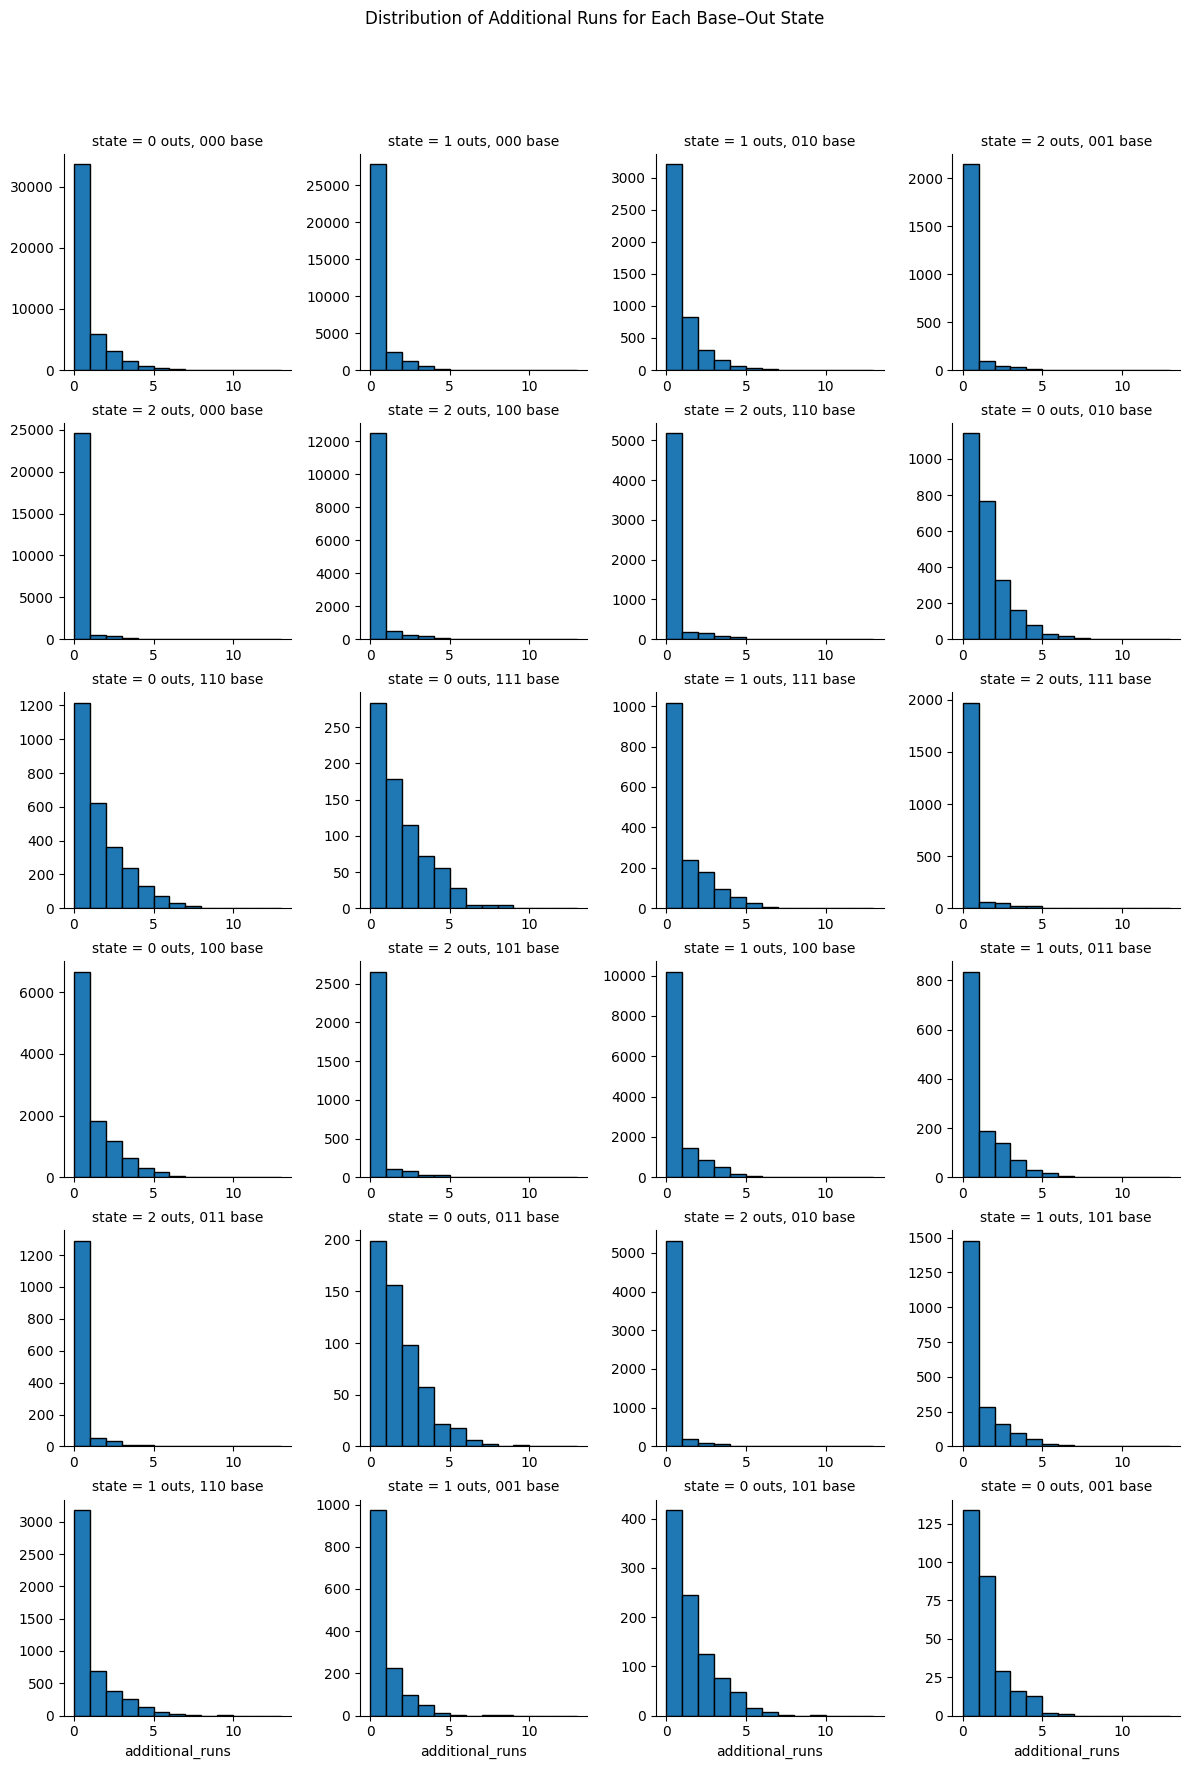

In [ ]:
# Example usage:
plot_runs_distribution(mlb_data_by_gamepk)


RUN PROBABILITY MATRIX FOR SCORING AT LEAST ONE RUN

In [ ]:
import pandas as pd

def extract_post_base_state(row):
    """
    Extracts the post-play base state as a three-character string.
    Each digit is '1' if a runner is on that base, or '0' otherwise.
    """
    first = '1' if not pd.isna(row.get('matchup.postOnFirst.id')) else '0'
    second = '1' if not pd.isna(row.get('matchup.postOnSecond.id')) else '0'
    third = '1' if not pd.isna(row.get('matchup.postOnThird.id')) else '0'
    return f"{first}{second}{third}"

def compute_run_probability(df):
    """
    Computes the probability of at least one run being scored in the remainder
    of a half–inning by:
      1. Sorting plays by game, inning, half–inning, and play order.
      2. Creating a pre–play base state by shifting the post–play base state within each half–inning.
      3. Creating a pre–play outs state by shifting down the 'count.outs' column and replacing any 3 with 0.
      4. Calculating additional_runs for each play as the difference between the final
         batting team score for that half–inning and the batting team score at that play.
      5. Adding an indicator for whether at least one run was scored (i.e. additional_runs >= 1).
      6. Grouping by pre–play outs and pre–play base state to compute the mean of the indicator,
         which is the probability.
    """
    # Sort by game, inning, half–inning, and play order.
    df = df.sort_values(by=["gamePk", "inning", "halfInning", "play_index"]).copy()

    # Extract the post–play base state.
    df["post_base_state"] = df.apply(extract_post_base_state, axis=1)

    # Create the pre–play base state by shifting the post–play state within each half–inning.
    df["pre_base_state"] = df.groupby(["gamePk", "inning", "halfInning"])["post_base_state"].shift(1)
    df["pre_base_state"] = df["pre_base_state"].fillna("000")

    # Create pre–play outs by shifting the 'count.outs' column down one row.
    df["pre_outs"] = df.groupby(["gamePk", "inning", "halfInning"])["count.outs"].shift(1)
    df["pre_outs"] = df["pre_outs"].fillna(0).astype(int)
    # Replace any value of 3 with 0 (indicating the start of a new half–inning).
    df.loc[df["pre_outs"] == 3, "pre_outs"] = 0

    # Determine the batting team's score for each play.
    # For top half–innings, the batting team is away; for bottom half–innings, it is home.
    df["batting_score"] = df.apply(lambda row: row["result.awayScore"] if row["halfInning"] == "top"
                                   else row["result.homeScore"], axis=1)

    # For each half–inning, compute the final batting score (the maximum score reached).
    df["final_score"] = df.groupby(["gamePk", "inning", "halfInning"])["batting_score"].transform("max")

    # Compute additional_runs for each play.
    df["additional_runs"] = df["final_score"] - df["batting_score"]

    # Create an indicator for whether at least one run was scored.
    df["run_scored"] = (df["additional_runs"] >= 1).astype(int)

    # Group by pre–play outs and pre–play base state and compute the probability.
    run_prob = df.groupby(["pre_outs", "pre_base_state"])["run_scored"].mean().reset_index()
    run_prob.rename(columns={"pre_outs": "outs",
                             "pre_base_state": "base_state",
                             "run_scored": "prob_run_scored"}, inplace=True)

    return run_prob

def build_run_probability_matrix(mlb_data_by_gamepk):
    """
    Processes the MLB JSON dictionary (keyed by gamePk) by:
      1. Flattening each game's play-by-play data.
      2. Creating grouping columns for inning and half–inning from the 'about' section.
      3. Computing the probability of at least one run being scored using the pre–play base state and pre–play outs.
    """
    all_plays = []

    for gamePk, game_data in mlb_data_by_gamepk.items():
        try:
            # Flatten the play-by-play data for the game.
            plays = pd.json_normalize(game_data['liveData']['plays']['allPlays'])
            plays['gamePk'] = gamePk

            # Create grouping columns: inning and half–inning.
            plays['inning'] = plays['about.inning']
            plays['halfInning'] = plays['about.isTopInning'].apply(lambda x: 'top' if x else 'bottom')
            # Use the DataFrame index as a simple play order indicator.
            plays['play_index'] = plays.index

            all_plays.append(plays)
        except KeyError as e:
            print(f"Skipping game {gamePk} due to missing data: {e}")

    if not all_plays:
        raise ValueError("No play-by-play data found in the provided dictionary.")

    all_plays_df = pd.concat(all_plays, ignore_index=True)
    return compute_run_probability(all_plays_df)

def build_run_probability_pivot(mlb_data_by_gamepk):
    """
    Builds and pivots the run probability matrix so that:
      - Rows represent the pre–play outs (0, 1, or 2).
      - Columns represent the base states (e.g., '000', '001', etc.).
    The cell values represent the probability of at least one run being scored from that state.
    """
    run_prob = build_run_probability_matrix(mlb_data_by_gamepk)
    pivot_matrix = run_prob.pivot(index='outs', columns='base_state', values='prob_run_scored')
    pivot_matrix = pivot_matrix.reindex(index=[0, 1, 2])
    return pivot_matrix


In [ ]:
run_probs = build_run_probability_pivot(mlb_data_by_gamepk)
run_probs

base_state,000,001,010,011,100,101,110,111
outs,,,,,,,,
0,0.258239,0.531469,0.549151,0.644643,0.386999,0.555319,0.548255,0.619813
1,0.138644,0.289359,0.303537,0.348402,0.232686,0.294651,0.327204,0.370828
2,0.042431,0.075895,0.064141,0.080542,0.071567,0.089506,0.086027,0.076707


FIRST INNING RUN PROBABILITY

In [ ]:
import pandas as pd

def extract_post_base_state(row):
    """
    Extracts the post-play base state as a three-character string.
    Each digit is '1' if a runner is on that base, or '0' otherwise.
    """
    first = '1' if not pd.isna(row.get('matchup.postOnFirst.id')) else '0'
    second = '1' if not pd.isna(row.get('matchup.postOnSecond.id')) else '0'
    third = '1' if not pd.isna(row.get('matchup.postOnThird.id')) else '0'
    return f"{first}{second}{third}"

def compute_run_probability(df):
    """
    Computes the probability of at least one run being scored in the remainder
    of a half–inning by:
      1. Sorting plays by game, inning, half–inning, and play order.
      2. Creating a pre–play base state by shifting the post–play base state within each half–inning.
      3. Creating a pre–play outs state by shifting down the 'count.outs' column and replacing any 3 with 0.
      4. Calculating additional_runs for each play as the difference between the final
         batting team score for that half–inning and the batting team score at that play.
      5. Adding an indicator for whether at least one run was scored (i.e. additional_runs >= 1).
      6. Grouping by pre–play outs and pre–play base state to compute the mean of the indicator,
         which is the probability.
    """
    # Sort by game, inning, half–inning, and play order.
    df = df.sort_values(by=["gamePk", "inning", "halfInning", "play_index"]).copy()

    # Extract the post–play base state.
    df["post_base_state"] = df.apply(extract_post_base_state, axis=1)

    # Create the pre–play base state by shifting the post–play state within each half–inning.
    df["pre_base_state"] = df.groupby(["gamePk", "inning", "halfInning"])["post_base_state"].shift(1)
    df["pre_base_state"] = df["pre_base_state"].fillna("000")

    # Create pre–play outs by shifting the 'count.outs' column down one row.
    df["pre_outs"] = df.groupby(["gamePk", "inning", "halfInning"])["count.outs"].shift(1)
    df["pre_outs"] = df["pre_outs"].fillna(0).astype(int)
    # Replace any value of 3 with 0 (indicating the start of a new half–inning).
    df.loc[df["pre_outs"] == 3, "pre_outs"] = 0

    # Determine the batting team's score for each play.
    df["batting_score"] = df.apply(lambda row: row["result.awayScore"] if row["halfInning"] == "top"
                                   else row["result.homeScore"], axis=1)

    # For each half–inning, compute the final batting score (the maximum score reached).
    df["final_score"] = df.groupby(["gamePk", "inning", "halfInning"])["batting_score"].transform("max")

    # Compute additional_runs for each play.
    df["additional_runs"] = df["final_score"] - df["batting_score"]

    # Create an indicator for whether at least one run was scored.
    df["run_scored"] = (df["additional_runs"] >= 1).astype(int)

    # Group by pre–play outs and pre–play base state and compute the probability.
    run_prob = df.groupby(["pre_outs", "pre_base_state"])["run_scored"].mean().reset_index()
    run_prob.rename(columns={"pre_outs": "outs",
                             "pre_base_state": "base_state",
                             "run_scored": "prob_run_scored"}, inplace=True)

    return run_prob

def build_run_probability_matrix(mlb_data_by_gamepk):
    """
    Processes the MLB JSON dictionary (keyed by gamePk) by:
      1. Flattening each game's play-by-play data.
      2. Creating grouping columns for inning and half–inning from the 'about' section.
      3. Filtering to only include plays from the first inning.
      4. Computing the probability of at least one run being scored using the pre–play base state and pre–play outs.
    """
    all_plays = []

    for gamePk, game_data in mlb_data_by_gamepk.items():
        try:
            # Flatten the play-by-play data for the game.
            plays = pd.json_normalize(game_data['liveData']['plays']['allPlays'])
            plays['gamePk'] = gamePk

            # Create grouping columns: inning and half–inning.
            plays['inning'] = plays['about.inning']
            plays['halfInning'] = plays['about.isTopInning'].apply(lambda x: 'top' if x else 'bottom')
            # Use the DataFrame index as a simple play order indicator.
            plays['play_index'] = plays.index

            # Filter for plays in the first inning only.
            plays = plays[plays['inning'] == 1]

            all_plays.append(plays)
        except KeyError as e:
            print(f"Skipping game {gamePk} due to missing data: {e}")

    if not all_plays:
        raise ValueError("No play-by-play data found in the provided dictionary.")

    all_plays_df = pd.concat(all_plays, ignore_index=True)
    return compute_run_probability(all_plays_df)

def build_run_probability_pivot(mlb_data_by_gamepk):
    """
    Builds and pivots the run probability matrix so that:
      - Rows represent the pre–play outs (0, 1, or 2).
      - Columns represent the base states (e.g., '000', '001', etc.).
    The cell values represent the probability of at least one run being scored from that state.
    """
    run_prob = build_run_probability_matrix(mlb_data_by_gamepk)
    pivot_matrix = run_prob.pivot(index='outs', columns='base_state', values='prob_run_scored')
    pivot_matrix = pivot_matrix.reindex(index=[0, 1, 2])
    return pivot_matrix


In [ ]:
run_probs = build_run_probability_pivot(mlb_data_by_gamepk)
run_probs

base_state,000,001,010,011,100,101,110,111
outs,,,,,,,,
0,0.271429,0.414634,0.587692,0.587302,0.385258,0.565574,0.545723,0.538462
1,0.141991,0.213235,0.314342,0.242188,0.231017,0.289362,0.296226,0.341317
2,0.039751,0.088710,0.062500,0.050955,0.069211,0.063291,0.071097,0.054455


In [ ]:
import pandas as pd

def compute_first_inning_run_probability(mlb_data_by_gamepk):
    """
    Computes the probability that a run is scored in the first inning of a game.

    For each game:
      1. Flatten the play-by-play data.
      2. Filter to only the first inning (inning == 1).
      3. For each half–inning (top and bottom), determine if the batting team's score
         increased from the first play to the last play in that half–inning.
      4. If either half–inning shows an increase in score, mark the game as one in which
         a run was scored.

    Returns:
      A float representing the fraction of games with at least one run scored in the first inning.
    """
    game_results = []

    for gamePk, game_data in mlb_data_by_gamepk.items():
        try:
            # Flatten the play-by-play data.
            plays = pd.json_normalize(game_data['liveData']['plays']['allPlays'])
            plays['gamePk'] = gamePk

            # Create grouping columns: inning and halfInning.
            plays['inning'] = plays['about.inning']
            plays['halfInning'] = plays['about.isTopInning'].apply(lambda x: 'top' if x else 'bottom')
            plays['play_index'] = plays.index

            # Filter to only plays from the first inning.
            inning_plays = plays[plays['inning'] == 1].copy()
            if inning_plays.empty:
                # Skip games without any plays in the first inning.
                continue

            # Compute batting score for each play:
            # For top half–innings, use the away score; for bottom, use the home score.
            inning_plays['batting_score'] = inning_plays.apply(
                lambda row: row["result.awayScore"] if row["halfInning"] == "top"
                            else row["result.homeScore"],
                axis=1
            )

            # Check each half–inning: if the final score is higher than the initial score, a run was scored.
            run_scored = False
            for half, group in inning_plays.groupby("halfInning"):
                group = group.sort_values(by="play_index")
                initial_score = group['batting_score'].iloc[0]
                final_score = group['batting_score'].iloc[-1]
                if final_score > initial_score:
                    run_scored = True
                    break

            game_results.append({'gamePk': gamePk, 'run_scored': run_scored})
        except KeyError as e:
            print(f"Skipping game {gamePk} due to missing data: {e}")

    results_df = pd.DataFrame(game_results)
    if results_df.empty:
        raise ValueError("No game data available to compute the first inning run probability.")

    # The probability is the fraction of games where run_scored is True.
    probability = results_df['run_scored'].mean()
    return probability

In [ ]:
# Example usage:
probability = compute_first_inning_run_probability(mlb_data_by_gamepk)
print(f"Probability of a run being scored in the first inning: {probability:.2%}")


Probability of a run being scored in the first inning: 46.50%


Team First Inning Run Probability

In [ ]:
import pandas as pd

def compute_first_inning_run_splits(mlb_data_by_gamepk):
    """
    Computes the first-inning run scoring splits for each team, including:
      - The away split: the percentage of games where the away team scored in the top of the first inning.
      - The home split: the percentage of games where the home team scored in the bottom of the first inning.
      - The overall percentage: combining both home and away appearances.

    Parameters:
      mlb_data_by_gamepk (dict): A dictionary keyed by gamePk, where each value is the game data
                                 containing nested play-by-play and team information.

    Returns:
      A DataFrame with columns:
         - team: Team abbreviation.
         - away_percentage: Fraction of games as away team scoring in the first inning.
         - home_percentage: Fraction of games as home team scoring in the first inning.
         - overall_percentage: Fraction of total games (home and away) scoring in the first inning.
    """
    game_records = []

    for gamePk, game_data in mlb_data_by_gamepk.items():
        try:
            # Extract team information from the game data.
            home_team = game_data['gameData']['teams']['home']['abbreviation']
            away_team = game_data['gameData']['teams']['away']['abbreviation']

            # Flatten the play-by-play data.
            plays = pd.json_normalize(game_data['liveData']['plays']['allPlays'])
            plays['inning'] = plays['about.inning']
            plays['halfInning'] = plays['about.isTopInning'].apply(lambda x: 'top' if x else 'bottom')
            plays['play_index'] = plays.index  # Using index as play order indicator.

            # Filter to only plays from the first inning.
            inning_plays = plays[plays['inning'] == 1].copy()
            if inning_plays.empty:
                # Skip game if no first inning plays are found.
                continue

            # For the away team (top half–inning), compute if a run was scored.
            away_plays = inning_plays[inning_plays['halfInning'] == 'top']
            away_run_scored = False
            if not away_plays.empty:
                away_plays = away_plays.sort_values(by='play_index')
                # For top half, the batting team is the away team.
                initial_score = away_plays.iloc[0]['result.awayScore']
                final_score = away_plays.iloc[-1]['result.awayScore']
                away_run_scored = final_score > initial_score

            # For the home team (bottom half–inning), compute if a run was scored.
            home_plays = inning_plays[inning_plays['halfInning'] == 'bottom']
            home_run_scored = False
            if not home_plays.empty:
                home_plays = home_plays.sort_values(by='play_index')
                # For bottom half, the batting team is the home team.
                initial_score = home_plays.iloc[0]['result.homeScore']
                final_score = home_plays.iloc[-1]['result.homeScore']
                home_run_scored = final_score > initial_score

            game_records.append({
                'gamePk': gamePk,
                'home_team': home_team,
                'away_team': away_team,
                'away_run_scored': away_run_scored,
                'home_run_scored': home_run_scored
            })

        except KeyError as e:
            print(f"Skipping game {gamePk} due to missing data: {e}")

    if not game_records:
        raise ValueError("No game data available to compute the first inning run splits.")

    games_df = pd.DataFrame(game_records)

    # Calculate splits for away appearances.
    away_split = (
        games_df.groupby('away_team')['away_run_scored']
                .mean()
                .reset_index()
                .rename(columns={'away_team': 'team', 'away_run_scored': 'away_percentage'})
    )

    # Calculate splits for home appearances.
    home_split = (
        games_df.groupby('home_team')['home_run_scored']
                .mean()
                .reset_index()
                .rename(columns={'home_team': 'team', 'home_run_scored': 'home_percentage'})
    )

    # To compute an overall percentage, stack the home and away results.
    away_overall = games_df[['away_team', 'away_run_scored']].rename(
        columns={'away_team': 'team', 'away_run_scored': 'run_scored'}
    )
    home_overall = games_df[['home_team', 'home_run_scored']].rename(
        columns={'home_team': 'team', 'home_run_scored': 'run_scored'}
    )
    overall = pd.concat([away_overall, home_overall], ignore_index=True)
    overall_split = (
        overall.groupby('team')['run_scored']
               .mean()
               .reset_index()
               .rename(columns={'run_scored': 'overall_percentage'})
    )

    # Merge the splits together.
    team_splits = pd.merge(away_split, home_split, on='team', how='outer')
    team_splits = pd.merge(team_splits, overall_split, on='team', how='outer')

    return team_splits

In [ ]:
# Example usage:
team_run_splits = compute_first_inning_run_splits(mlb_data_by_gamepk)
team_run_splits


,team,away_percentage,home_percentage,overall_percentage
0,ATL,0.283951,0.481481,0.382716
1,AZ,0.345679,0.370370,0.358025
2,BAL,0.209877,0.283951,0.246914
3,BOS,0.185185,0.370370,0.277778
4,CHC,0.197531,0.345679,0.271605
5,CIN,0.197531,0.333333,0.265432
6,CLE,0.222222,0.296296,0.259259
7,COL,0.259259,0.222222,0.240741
8,CWS,0.172840,0.296296,0.234568
9,DET,0.246914,0.259259,0.253086


Team First Inning Pitching and Hitting Stats